In [1]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from time import time, gmtime, sleep
import sys
sys.path.append("/home/jovyan/HSE-Bioinformatics")
sys.path.append("/home/jovyan/diploma_scripts/scripts")
from bio import *
import dcona_runs
import dcona
from tqdm.auto import tqdm; tqdm.pandas()
import telegram_send
import multiprocessing
import os

In [2]:
SHARED_PATH = Path('/home/jovyan/shared')
TCGA_PATH = SHARED_PATH / 'TCGA_data'
OUTPUT_PATH = SHARED_PATH / 'narek/outputs'
BRCA_DATA = SHARED_PATH / 'narek/Diplom2/data_BRCA'

TCGA_STUDY = 'TCGA-BRCA'
iso_type = "pan_cancer_exclusive_log2_FPM_DESeq2"
annotation = rt(BRCA_DATA/'annotation.tsv')

In [28]:
gene_exp = rt(f"{TCGA_PATH}/{TCGA_STUDY}/RSEM_transcript_pan_cancer_log2_FPKM_DESeq2.tsv")

In [29]:
data = dcona_runs.DataProcessor(dcona_runs.remove_transcript_version(gene_exp), annotation, pd.DataFrame())

In [30]:
key_genes = {
    'AGO2': 'ENST00000220592',
    'DROSHA': 'ENST00000513349',
    'DGCR8': 'ENST00000351989',
    'DICER1': 'ENST00000393063'
}

In [31]:
expr_dict = {}
for subtype in ['Normal', 'Luminal A', 'Luminal B', 'Basal-like']:
    data.cutoff_expressions(subtypes=[subtype])
    expr_dict[subtype] = data.cutted_exp

23376 genes and 105 samples are chosen
22000 genes and 562 samples are chosen
21622 genes and 211 samples are chosen
20863 genes and 184 samples are chosen


In [170]:
from importlib import reload
reload(dcona_runs)

<module 'dcona_runs' from '/home/jovyan/diploma_scripts/scripts/dcona_runs.py'>

In [107]:
# def sample_df_for_swarplot(expr_dict, transcript, gene_name, subtype_dict, extra_columns=['gene symbol']):
#     output_df_list = list()
#     for subtype in subtype_dict.keys():
#         cutter = dcona_runs.CuttingSamples(expr_dict[subtype], extra_columns=extra_columns)
#         cutter.cut(transcript, q=subtype_dict[subtype]['qcut'], plot=False, suppress_print=True)
#         df = cutter.extract_samples(left_num=subtype_dict[subtype]['left'], 
#                                     right_num=subtype_dict[subtype]['right'], 
#                                     return_values=True, return_all=True)
#         df['Subtype'] = [subtype] * df.shape[0]
#         output_df_list.append(df)
#     return pd.concat(output_df_list)

In [193]:
import matplotlib as mpl
font_paths = mpl.font_manager.findSystemFonts("/home/jovyan/.local/share/fonts")
font_objects = mpl.font_manager.get_font_names()
font_names = [f for f in font_objects]
print(font_names)
print(font_paths)

['TeX Gyre Cursor', 'Latin Modern Roman Dunhill', 'Latin Modern Mono Caps', 'Latin Modern Math', 'URW Bookman', 'Nimbus Sans', 'D050000L', 'Latin Modern Mono', 'DejaVu Sans', 'Nimbus Mono PS', 'TeX Gyre Pagella', 'TeX Gyre Heros', 'TeX Gyre Adventor', 'DejaVu Sans Mono', 'TeX Gyre Termes', 'DejaVu Sans Display', 'C059', 'TeX Gyre Chorus', 'Noto Sans Mono', 'Droid Sans Fallback', 'Standard Symbols PS', 'cmsy10', 'Latin Modern Sans Demi Cond', 'Latin Modern Mono Light', 'Latin Modern Mono Prop', 'TeX Gyre DejaVu Math', 'Latin Modern Sans Quotation', 'Latin Modern Sans', 'TeX Gyre Bonum', 'TeX Gyre Bonum Math', 'Latin Modern Mono Slanted', 'cmr10', 'Latin Modern Mono Prop Light', 'Latin Modern Roman Caps', 'Z003', 'cmb10', 'TeX Gyre Heros Cn', 'cmtt10', 'STIXSizeFiveSym', 'P052', 'URW Gothic', 'Latin Modern Roman Slanted', 'STIXSizeThreeSym', 'cmss10', 'Lato', 'DejaVu Serif Display', 'STIXGeneral', 'DejaVu Serif', 'Latin Modern Mono Light Cond', 'Latin Modern Roman', 'TeX Gyre Pagella Mat

In [196]:
prop = mpl.font_manager.FontProperties(fname='/home/jovyan/.local/share/fonts/HSESans-Regular.otf')
prop.get_name()


'HSE Sans'

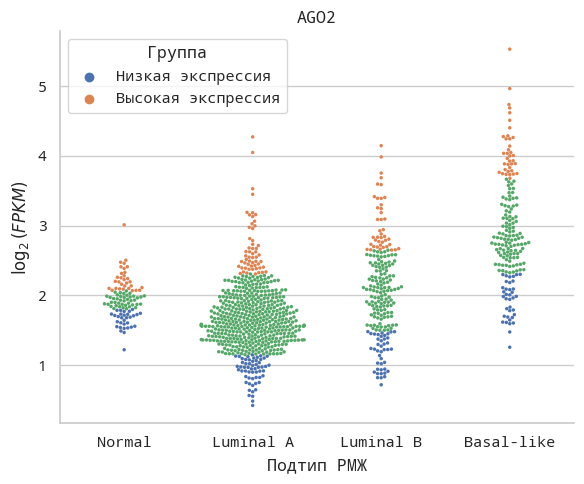

In [91]:
gene_name='AGO2'
swarm_df = dcona_runs.sample_df_for_swarplot(expr_dict, key_genes[gene_name], gene_name, 
             {
                 'Normal': {'qcut': 10, 'left': 3, 'right': 3},
                 'Luminal A': {'qcut': 20, 'left': 2, 'right': 2},
                 'Luminal B': {'qcut': 10, 'left': 2, 'right': 2},
                 'Basal-like': {'qcut': 10, 'left': 2, 'right': 2}
             }
            )

g, ax = plt.subplots(figsize=(6, 5))
g = sns.swarmplot(data=swarm_df, y="Value", x="Subtype", hue="Group", legend=True, size=2.5, ax=ax)
# sns.set_context(rc={'font': 'Noto Mono', 'style': 'whitegrid'})
sns.set(font='Noto Mono', style='whitegrid')
plt.title(gene_name)
plt.ylabel(r'$\log_{2}(FPKM)$')
plt.xlabel('Подтип РМЖ')
g.legend_.set_title('Группа')
for t, l in zip(g.legend_.texts, ['Низкая экспрессия', 'Высокая экспрессия']):
    t.set_text(l)
sns.despine()
plt.tight_layout()
plt.savefig(f'figures/distrib_swarm/{gene_name}_swarmplot.png', dpi=400)

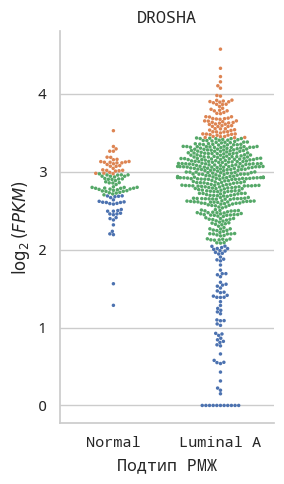

In [92]:
gene_name='DROSHA'
swarm_df = dcona_runs.sample_df_for_swarplot(expr_dict, key_genes[gene_name], gene_name, 
             {
                 'Normal': {'qcut': 10, 'left': 3, 'right': 3},
                 'Luminal A': {'qcut': 30, 'left': 4, 'right': 4},
             }
            )

g, ax = plt.subplots(figsize=(3, 5))
g = sns.swarmplot(data=swarm_df, y="Value", x="Subtype", hue="Group", size=2.5, legend=False, ax=ax)
# sns.set_context(rc={'font': 'Noto Mono', 'style': 'whitegrid'})
sns.set(font='Noto Mono', style='whitegrid')
plt.title(gene_name)
plt.ylabel(r'$\log_{2}(FPKM)$')
plt.xlabel('Подтип РМЖ')
# g.legend_.set_title('Группа')
# for t, l in zip(g.legend_.texts, ['Низкая экспрессия', 'Высокая экспрессия']):
#     t.set_text(l)
sns.despine()
plt.tight_layout()
plt.savefig(f'figures/distrib_swarm/{gene_name}_swarmplot.png', dpi=400)

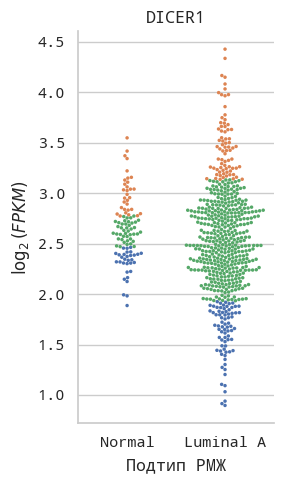

In [93]:
gene_name='DICER1'
swarm_df = dcona_runs.sample_df_for_swarplot(expr_dict, key_genes[gene_name], gene_name, 
             {
                 'Normal': {'qcut': 10, 'left': 3, 'right': 3},
                 'Luminal A': {'qcut': 30, 'left': 4, 'right': 4},
             }
            )

g, ax = plt.subplots(figsize=(3, 5))
g = sns.swarmplot(data=swarm_df, y="Value", x="Subtype", hue="Group",  size=2.5, legend=False, ax=ax)
# sns.set_context(rc={'font': 'Noto Mono', 'style': 'whitegrid'})
sns.set(font='Noto Mono', style='whitegrid')
plt.title(gene_name)
plt.ylabel(r'$\log_{2}(FPKM)$')
plt.xlabel('Подтип РМЖ')
# g.legend_.set_title('Группа')
# for t, l in zip(g.legend_.texts, ['Низкая экспрессия', 'Высокая экспрессия']):
#     t.set_text(l)
sns.despine()
plt.tight_layout()
plt.savefig(f'figures/distrib_swarm/{gene_name}_swarmplot.png', dpi=400)

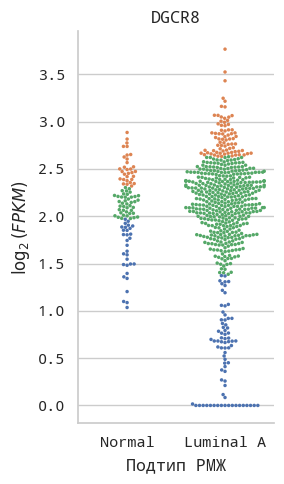

In [94]:
gene_name='DGCR8'
swarm_df = dcona_runs.sample_df_for_swarplot(expr_dict, key_genes[gene_name], gene_name, 
             {
                 'Normal': {'qcut': 10, 'left': 3, 'right': 3},
                 'Luminal A': {'qcut': 30, 'left': 4, 'right': 4},
             }
            )

g, ax = plt.subplots(figsize=(3, 5))
g= sns.swarmplot(data=swarm_df, y="Value", x="Subtype", hue="Group", size=2.5, legend=False, ax=ax)
# sns.set_context(rc={'font': 'Noto Mono', 'style': 'whitegrid'})
sns.set(font='Noto Mono', style='whitegrid')
plt.title(gene_name)
plt.ylabel(r'$\log_{2}(FPKM)$')
plt.xlabel('Подтип РМЖ')
# g.legend_.set_title('Группа')
# for t, l in zip(g.legend_.texts, ['Низкая экспрессия', 'Высокая экспрессия']):
#     t.set_text(l)
sns.despine()
plt.tight_layout()
plt.savefig(f'figures/distrib_swarm/{gene_name}_swarmplot.png', dpi=400)

## Venn

In [15]:
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
%matplotlib inline

In [7]:
gene_exp = rt(f"{TCGA_PATH}/{TCGA_STUDY}/RSEM_transcript_pan_cancer_log2_FPKM_DESeq2.tsv")

In [8]:
annotation = rt(BRCA_DATA/'annotation.tsv')
mirna = rt(f"{TCGA_PATH}/{TCGA_STUDY}/isoMiRmap_{iso_type}.tsv")
descr = rc(SHARED_PATH/'narek/outputs/sample_cuts/DGCR8_normal_ENST00000351989_62_samples.csv')

In [17]:
raw_rna22_inter = rt(SHARED_PATH/'miRNA_predictions_BRCA/RNA22.tsv', i=None)
raw_ts_inter = rt(SHARED_PATH/'miRNA_predictions_BRCA/TargetScan.tsv', i=None)

In [18]:
subtype = ['Luminal A']

data = dcona_runs.DataProcessor(gene_exp, annotation, mirna)
data.cutoff_expressions(subtypes=subtype)
data.cutoff_mirnas()
_, _, interaction_ts_filtered = data.final_data(descr, raw_ts_inter)
_, _, interaction_rna22_filtered = data.final_data(descr, raw_rna22_inter)

23376 genes and 105 samples are chosen
142 miRNAs are chosen


In [19]:
common_count = (interaction_ts_filtered.reset_index()
        .merge(interaction_rna22_filtered.reset_index(), on=['Source','Target'])
        .sort_values('index_x')
        .groupby(['index_x','Source','Target'])['index_y']
        .transform('first')
        .shape[0]
        )
rna22_unique_count = interaction_rna22_filtered.shape[0] - common_count
ts_unique_count = interaction_ts_filtered.shape[0] - common_count

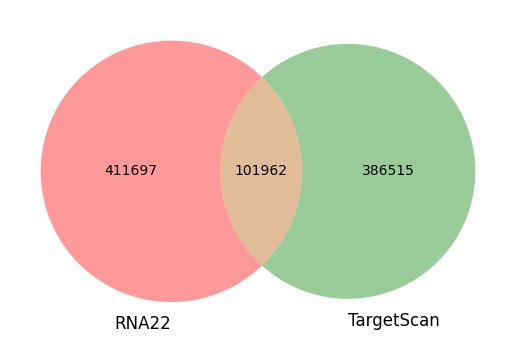

In [20]:
venn2(subsets = (rna22_unique_count, ts_unique_count, common_count), set_labels = ('RNA22', 'TargetScan'))
plt.savefig(f'figures/inter_venn/{subtype[0]}.png', dpi=400)

In [ ]:
rna22_inter = raw_rna22_inter[['isomir', 'transcript']].drop_duplicates()
rna22_inter.columns = ['Source', 'Target']
ts_inter = raw_ts_inter[['isomir', 'transcript']].drop_duplicates()
ts_inter.columns = ['Source', 'Target']

In [ ]:
common_count = (rna22_inter.reset_index()
        .merge(ts_inter.reset_index(), on=['Source','Target'])
        .sort_values('index_x')
        .groupby(['index_x','Source','Target'])['index_y']
        .transform('first')
        .shape[0]
        )
rna22_unique_count = rna22_inter.shape[0] - common_count
ts_unique_count = ts_inter.shape[0] - common_count

In [ ]:
venn2(subsets = (rna22_unique_count, ts_unique_count, common_count), set_labels = ('RNA22', 'TargetScan'))
plt.savefig('figures/inter_venn/full_table.png', dpi=400)

In [53]:
swarm_ago = dcona_runs.sample_df_for_swarplot(expr_dict, key_genes['AGO2'], 'AGO2', 
             {
                 'Normal': {'qcut': 10, 'left': 3, 'right': 3},
                 'Luminal A': {'qcut': 20, 'left': 2, 'right': 2},
                 'Luminal B': {'qcut': 10, 'left': 2, 'right': 2},
                 'Basal-like': {'qcut': 10, 'left': 2, 'right': 2}
             })
swarm_drosha = dcona_runs.sample_df_for_swarplot(expr_dict, key_genes['DROSHA'], 'DROSHA', 
             {
                 'Normal': {'qcut': 10, 'left': 3, 'right': 3},
                 'Luminal A': {'qcut': 30, 'left': 4, 'right': 4},
             })
swarm_dicer = dcona_runs.sample_df_for_swarplot(expr_dict, key_genes['DICER1'], 'DICER1', 
             {
                 'Normal': {'qcut': 10, 'left': 3, 'right': 3},
                 'Luminal A': {'qcut': 30, 'left': 4, 'right': 4},
             })
swarm_dgcr = dcona_runs.sample_df_for_swarplot(expr_dict, key_genes['DGCR8'], 'DGCR8', 
             {
                 'Normal': {'qcut': 10, 'left': 3, 'right': 3},
                 'Luminal A': {'qcut': 30, 'left': 4, 'right': 4},
             })

In [54]:
swarm_combined = pd.DataFrame()
for gene, df in zip(['AGO2', 'DROSHA', 'DICER1', 'DGCR8'], [swarm_ago, swarm_drosha, swarm_dicer, swarm_dgcr]):
    df['Ген'] = [gene]*df.shape[0]
    swarm_combined = pd.concat([swarm_combined, df])

In [55]:
swarm_combined

,Sample,Group,Value,Subtype,Ген
0,TCGA-A7-A0CE-11,Low_expr,1.546171,Normal,AGO2
1,TCGA-A7-A13G-11,Low_expr,1.786531,Normal,AGO2
2,TCGA-AC-A2FM-11,Low_expr,1.222339,Normal,AGO2
3,TCGA-BH-A0AY-11,Low_expr,1.644162,Normal,AGO2
4,TCGA-BH-A0AZ-11,Low_expr,1.491463,Normal,AGO2
...,...,...,...,...,...
556,TCGA-S3-AA14-01,_Other,2.114796,Luminal A,DGCR8
557,TCGA-UL-AAZ6-01,_Other,1.882025,Luminal A,DGCR8
558,TCGA-W8-A86G-01,_Other,1.846664,Luminal A,DGCR8
559,TCGA-XX-A899-01,_Other,2.294786,Luminal A,DGCR8


Venn between TargetScan and RNA22 + pvalue < 0.05

In [4]:
def adjust_permute(df):
    df = df.copy()
    df['AdjPermutePvalue'] = df['PermutePvalue'] / round(df.rank(axis=0)["PermutePvalue"]) * df.shape[0]
    print('Pairs:', df.shape[0], '| after cut:', pvalue_cutoff(df, 'AdjPermutePvalue').shape[0])
    return df.sort_values('AdjPermutePvalue')

def pvalue_cutoff(df, by: str, alpha: float = 0.05):
    return df.loc[df[by] <= alpha]

In [5]:
ts_a = rc(OUTPUT_PATH/'experiments/2/ztest_ts.csv')
ts_a = adjust_permute(ts_a)
ts_a = pvalue_cutoff(ts_a, 'AdjPermutePvalue')

Pairs: 455889 | after cut: 766


In [6]:
rna22_a = rc(OUTPUT_PATH/'experiments/2/ztest_rna22.csv')
rna22_a = adjust_permute(rna22_a)
rna22_a = pvalue_cutoff(rna22_a, 'AdjPermutePvalue')

Pairs: 483291 | after cut: 848


In [12]:
common_count = (ts_a.reset_index()
        .merge(rna22_a.reset_index(), on=['Source','Target'])
        .sort_values('index_x')
        .groupby(['index_x','Source','Target'])['index_y']
        .transform('first')
        .shape[0]
        )
rna22_unique_count = rna22_a.shape[0] - common_count
ts_unique_count = ts_a.shape[0] - common_count

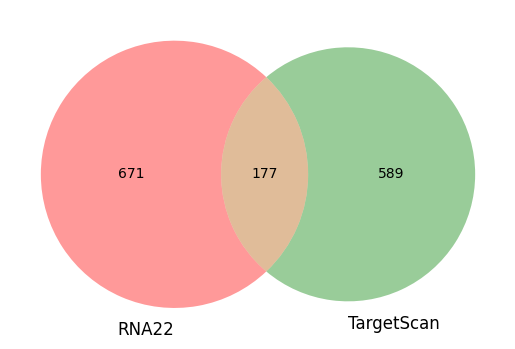

In [16]:
venn2(subsets = (rna22_unique_count, ts_unique_count, common_count), set_labels = ('RNA22', 'TargetScan'))
plt.savefig(OUTPUT_PATH/'experiments/2/venn_significant.png', dpi=400)